Load Household Power Consumption dataset

In [6]:
datafile = open('household_power_consumption.txt','r')
data = []
for line in datafile.readlines():
  data.append(line[0:-1].split(";"))

Convert txt file to Pandas Dataframe

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df = pd.DataFrame(data[1:], columns=data[0])

Calculate Unknown values

In [9]:
cnt = { 'count': 0 }

def count_unknown(arr, count):
  for val in arr:
    if val=='?' or val=='':
      count['count']+=1
      break
  return arr

df.apply(count_unknown, axis=1, raw=True, count=cnt)
print("Count of unnkown rows:", cnt['count'])
print(f"Unknown data is{(cnt['count']/df.shape[0])*100: .2f}% of total data points")

Count of unnkown rows: 25979
Unknown data is 1.25% of total data points


As unknown data is <2%, lets replace unknown values with None and dropping null values

In [10]:
df_processed = df.replace('?', None).replace('', None)
df_processed = df_processed.astype({
    "Global_active_power": float,
    "Global_reactive_power": float,
    "Voltage": float,
    "Global_intensity": float,
    "Sub_metering_1": float,
    "Sub_metering_2": float,
    "Sub_metering_3": float,
    })

Visualizing patterns in dataset

In [30]:
df_processed.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Global_active_energy
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,70.266667
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,89.333333
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,89.566667
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,89.800000
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,61.100000


Calculating correlation coefficient

In [12]:
values = df_processed[[ "Global_active_power", "Global_reactive_power", "Voltage",
                       "Global_intensity", "Sub_metering_1","Sub_metering_2", "Sub_metering_3"]]
values.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Global_active_power,1.000000,0.247017,-0.399762,0.998889,0.484401,0.434569,0.638555
Global_reactive_power,0.247017,1.000000,-0.112246,0.266120,0.123111,0.139231,0.089617
Voltage,-0.399762,-0.112246,1.000000,-0.411363,-0.195976,-0.167405,-0.268172
Global_intensity,0.998889,0.266120,-0.411363,1.000000,0.489298,0.440347,0.626543
Sub_metering_1,0.484401,0.123111,-0.195976,0.489298,1.000000,0.054721,0.102571
Sub_metering_2,0.434569,0.139231,-0.167405,0.440347,0.054721,1.000000,0.080872
Sub_metering_3,0.638555,0.089617,-0.268172,0.626543,0.102571,0.080872,1.000000


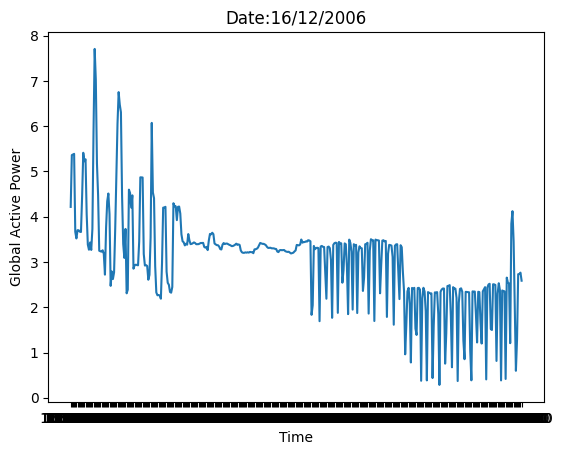

In [13]:
df_temp = df_processed[df_processed['Date']==df_processed['Date'][0]]
plt.plot(df_temp['Time'], df_temp['Global_active_power'])
plt.xlabel('Time')
plt.ylabel('Global Active Power')
plt.title('Date:'+str(df_processed['Date'][0]))
plt.show()

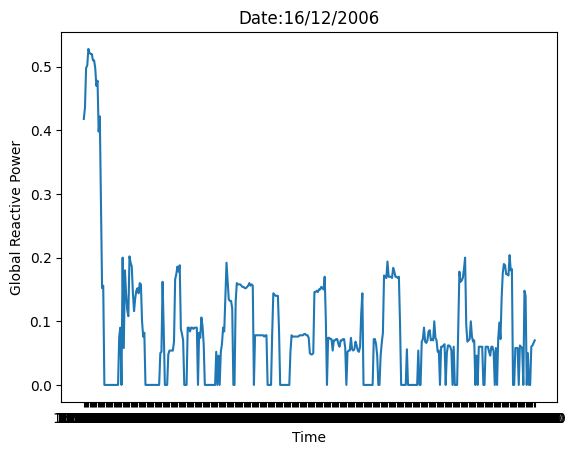

In [14]:
df_temp = df_processed[df_processed['Date']==df_processed['Date'][0]]
plt.plot(df_temp['Time'], df_temp['Global_reactive_power'])
plt.xlabel('Time')
plt.ylabel('Global Reactive Power')
plt.title('Date:'+str(df_processed['Date'][0]))
plt.show()

Generating new columns - time window based

In [15]:
#Converting Global active power(kW) to energy(WH)
df_processed['Global_active_energy'] = df_processed['Global_active_power']*(1000/60)
df_processed.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Global_active_energy
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,70.266667
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,89.333333
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,89.566667
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,89.800000
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,61.100000


In [16]:
# Calculating daily energy consumption
temp = df_processed[['Date','Global_active_energy','Sub_metering_1','Sub_metering_2','Sub_metering_3']]
daily_energy = temp.groupby('Date').sum()
# daily_energy.to_csv('daily_energy_consumption.csv')
daily_energy.head()

,Global_active_energy,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date,,,,
1/1/2007,45816.733333,0.0,352.0,5880.0
1/1/2008,45995.633333,2461.0,2739.0,12355.0
1/1/2009,23444.866667,765.0,3845.0,2803.0
1/1/2010,20404.200000,2304.0,327.0,3558.0
1/10/2007,28682.033333,1507.0,6622.0,5960.0


In [17]:
#saving minute average energy consumption to csv
df_processed.to_csv('minute_energy_consumption.csv')

Calculating peak hours of maximum energy consumption

In [18]:
import warnings
warnings.filterwarnings('ignore')

def find_peaks(date = '16/12/2006', window=4):
  temp = df_processed[df_processed['Date']==date]
  temp['Time'] = temp['Time'].apply(lambda x: x.split(':')[0]).astype(np.int32)
  max_ = 0
  max_i = -1
  for i in range(0,23):
    val = temp[(temp['Time']>=i) & (temp['Time']<(i+window))].sum()['Global_active_energy']
    if val>max_:
      max_ = val
      max_i = i
  return max_i, max_

hour, power_consumed = find_peaks(window=4)

print("Date: 16/12/2006")
print("================")
print(f"Hour range of peak energy consumption: {hour}:00:00 - {hour+4}:00:00")
print(f"Maximum energy consumed in 4 hour range: {power_consumed/1000: .2f} kWh")

Date: 16/12/2006
Hour range of peak energy consumption: 18:00:00 - 22:00:00
Maximum energy consumed in 4 hour range:  13.36 kWh


Creating Linear Regression model to reveal pattern

In [19]:
#Load daily dataset
daily_energy = pd.read_csv('daily_energy_consumption.csv')
daily_energy.head()

,Date,Global_active_energy,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,1/1/2007,45816.733333,0.0,352.0,5880.0
1,1/1/2008,45995.633333,2461.0,2739.0,12355.0
2,1/1/2009,23444.866667,765.0,3845.0,2803.0
3,1/1/2010,20404.200000,2304.0,327.0,3558.0
4,1/10/2007,28682.033333,1507.0,6622.0,5960.0


In [22]:
from prophet import Prophet

# Create a Prophet model with custom hyperparameters
model = Prophet(
    changepoint_prior_scale=0.15,
    yearly_seasonality=20,
    weekly_seasonality=10,
    daily_seasonality=4
)

In [23]:
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')

daily_energy['Date'] = daily_energy['Date'].apply(lambda x: datetime.strptime(x, "%d/%m/%Y").strftime("%Y/%m/%d"))
train_data = daily_energy[['Date', 'Global_active_energy']]

train_data.rename(columns = {
    'Date': 'ds',
    'Global_active_energy': 'y'
}, inplace=True)

model.fit(train_data)

20:34:01 - cmdstanpy - INFO - Chain [1] start processing
20:34:02 - cmdstanpy - INFO - Chain [1] done processing


In [24]:
# Make future predictions
future = model.make_future_dataframe(periods=0, freq='D')
forecast = model.predict(future)

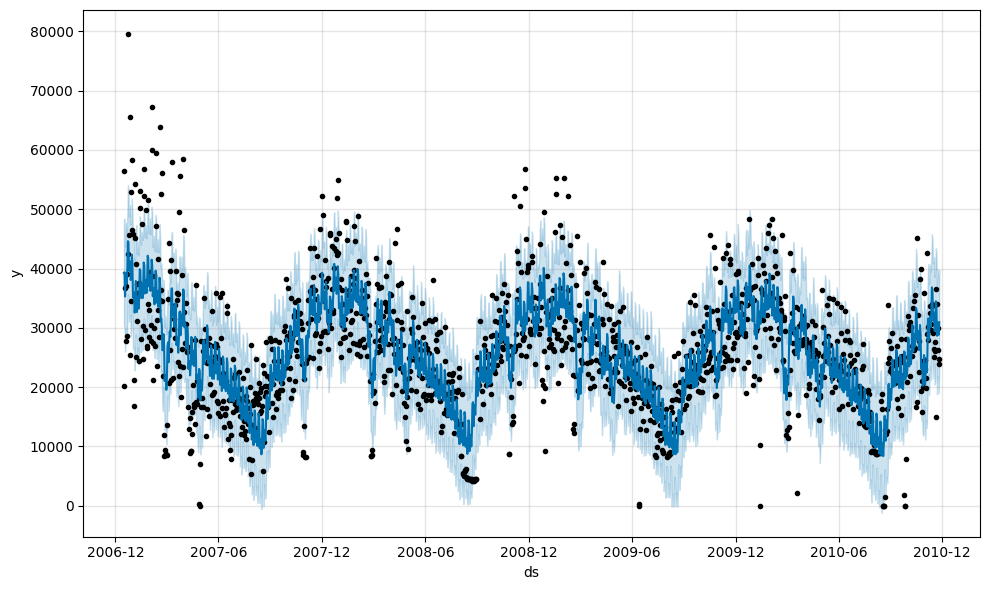

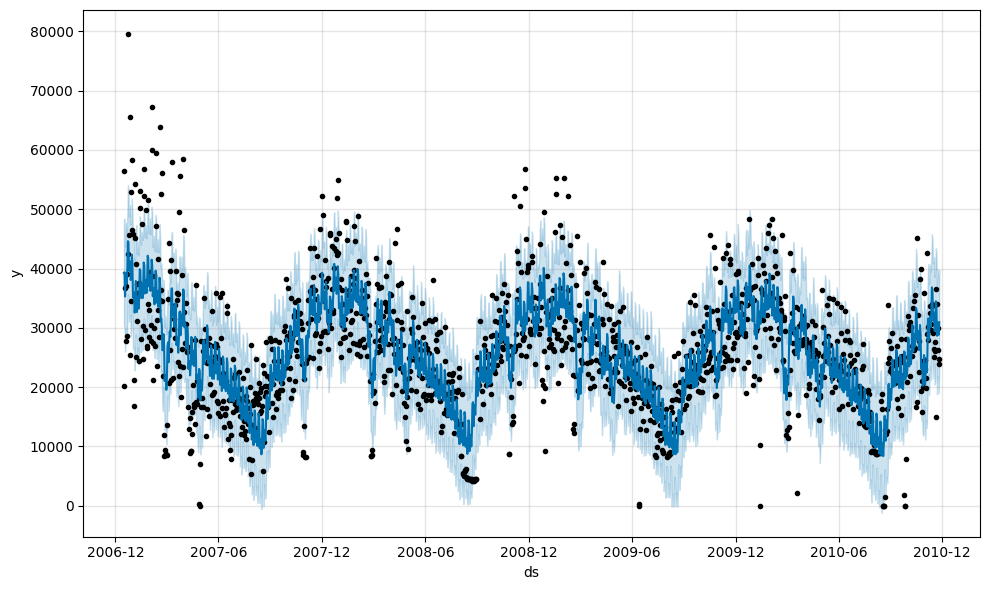

In [25]:
model.plot(forecast, uncertainty=True)

Calculating errors in prediction

In [26]:
forecast[['ds', 'yhat']].head()

,ds,yhat
0,2006-12-16,39261.558555
1,2006-12-17,39369.009279
2,2006-12-18,35293.756668
3,2006-12-19,37918.242898
4,2006-12-20,39029.597178


In [27]:
train_data['ds'] = train_data['ds'].astype('datetime64[ns]')
merged = pd.merge(left=forecast, right=train_data, on='ds')
merged['error'] = np.absolute(merged['yhat'] - merged['y'])

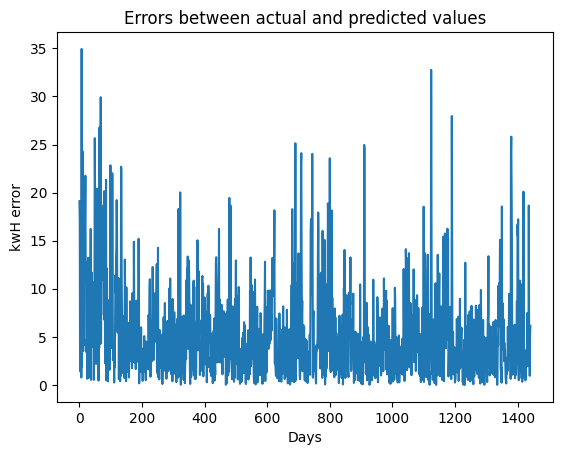

In [28]:
#plotting errors
(merged['error']/1000).plot()
plt.title('Errors between actual and predicted values')
plt.xlabel('Days')
plt.ylabel('kwH error')
plt.show()

In [29]:
#Calculating forecast error
temp = merged[['ds','y','yhat','error']][merged['y']>0]
err = np.sum(temp['error']/temp['y'])*100
print(f"Mean Absolute percentage error is: {err/temp.shape[0]: .2f}")

Mean Absolute percentage error is:  39.28


Objective: Forecast user energy consumption using historical data.

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [32]:
# Example Dataset: Historical energy consumption
data = pd.DataFrame({
    'date': pd.date_range(start='2023-01-01', periods=365, freq='D'),
    'temperature': np.random.uniform(15, 35, 365),
    'consumption': np.random.uniform(50, 200, 365)
})

In [33]:
# Feature Engineering
data['day_of_week'] = data['date'].dt.dayofweek
data['month'] = data['date'].dt.month

In [34]:
# Prepare data
X = data[['temperature', 'day_of_week', 'month']]
y = data['consumption']

In [35]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Train a model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [37]:
# Predict and Evaluate
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error: {mae:.2f} kWh")



Mean Absolute Error: 39.56 kWh


In [38]:
# Forecast for the next week
future_data = pd.DataFrame({
    'temperature': [20, 22, 21, 19, 18, 23, 24],
    'day_of_week': [0, 1, 2, 3, 4, 5, 6],
    'month': [11] * 7
})
forecast = model.predict(future_data)
print("Next Week's Forecast:", forecast)

Next Week's Forecast: [ 75.82368441  98.22823582 119.19880494 161.18098778 163.83186776
 121.40273303  95.42538086]


Objective: Minimize cost and emissions while maximizing savings.

In [48]:
from scipy.optimize import minimize

In [41]:
# Example Supplier Data
suppliers = pd.DataFrame({
    'supplier': ['A', 'B', 'C'],
    'cost_per_kWh': [0.10, 0.08, 0.09],
    'emission_factor': [0.4, 0.3, 0.2],  # kg CO2 per kWh
    'renewable_percent': [20, 50, 80]  # % renewable
})

In [42]:
# User's energy consumption
energy_usage = 500  # kWh per month

In [43]:
# Objective Function: Minimize cost + emissions
def objective(x):
    total_cost = np.sum(x * suppliers['cost_per_kWh'] * energy_usage)
    total_emissions = np.sum(x * suppliers['emission_factor'] * energy_usage)
    return total_cost + total_emissions

In [44]:
# Constraints: Allocation adds to 1
constraints = [{'type': 'eq', 'fun': lambda x: np.sum(x) - 1}]

# Bounds: Each supplier's contribution between 0 and 1
bounds = [(0, 1)] * len(suppliers)

# Initial Guess
initial_guess = [1 / len(suppliers)] * len(suppliers)

# Solve Optimization
result = minimize(objective, initial_guess, bounds=bounds, constraints=constraints)

# Optimal allocation
allocation = result.x
print("Optimal Supplier Allocation:", allocation)

Optimal Supplier Allocation: [0.00000000e+00 7.04403202e-12 1.00000000e+00]


In [45]:
# Compute savings and emissions
optimal_cost = np.sum(allocation * suppliers['cost_per_kWh'] * energy_usage)
optimal_emissions = np.sum(allocation * suppliers['emission_factor'] * energy_usage)
print(f"Optimal Cost: ${optimal_cost:.2f}, Emissions: {optimal_emissions:.2f} kg CO2")

Optimal Cost: $45.00, Emissions: 100.00 kg CO2


In [ ]:
Objective: Generate personalized recommendations using OpenAI’s GPT API.

In [55]:
import openai

In [ ]:
# Set up OpenAI API Key
openai.api_key = "your_openai_api_key_here"

In [ ]:
# Example prompt for generating a summary
def generate_summary(user_consumption, supplier, savings, emissions_reduction):
    prompt = (
        f"User's monthly energy consumption is {user_consumption} kWh. "
        f"Recommend switching to {supplier} which will save ${savings:.2f} per month "
        f"and reduce emissions by {emissions_reduction:.2f} kg CO2. Provide this in a user-friendly summary."
    )
    response = openai.Completion.create(
        engine="text-davinci-003",
        prompt=prompt,
        max_tokens=100
    )
    return response.choices[0].text.strip()

In [ ]:
# Example Usage
summary = generate_summary(500, "Supplier B", 15.00, 30.00)
print("Generated Summary:\n", summary)





In [56]:
!pip install cohere

Defaulting to user installation because normal site-packages is not writeable
  Using cached cohere-5.13.3-py3-none-any.whl.metadata (3.5 kB)
  Using cached fastavro-1.9.7.tar.gz (987 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached httpx_sse-0.4.0-py3-none-any.whl.metadata (9.0 kB)
  Using cached numpy-1.26.4.tar.gz (15.8 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  

  error: subprocess-exited-with-error
  
  Preparing metadata (pyproject.toml) did not run successfully.
  exit code: 1
  
  [21 lines of output]
  + C:\Program Files\Python313\python.exe C:\Users\harsh.chaudhary01\AppData\Local\Temp\pip-install-9uoxrax0\numpy_c7904e2d1b474ce1a709d519c439e87b\vendored-meson\meson\meson.py setup C:\Users\harsh.chaudhary01\AppData\Local\Temp\pip-install-9uoxrax0\numpy_c7904e2d1b474ce1a709d519c439e87b C:\Users\harsh.chaudhary01\AppData\Local\Temp\pip-install-9uoxrax0\numpy_c7904e2d1b474ce1a709d519c439e87b\.mesonpy-rvoj98mq -Dbuildtype=release -Db_ndebug=if-release -Db_vscrt=md --native-file=C:\Users\harsh.chaudhary01\AppData\Local\Temp\pip-install-9uoxrax0\numpy_c7904e2d1b474ce1a709d519c439e87b\.mesonpy-rvoj98mq\meson-python-native-file.ini
  The Meson build system
  Version: 1.2.99
  Source dir: C:\Users\harsh.chaudhary01\AppData\Local\Temp\pip-install-9uoxrax0\numpy_c7904e2d1b474ce1a709d519c439e87b
  Build dir: C:\Users\harsh.chaudhary01\AppData\Local\T

In [54]:
import cohere


ModuleNotFoundError: No module named 'cohere'

In [ ]:

co = cohere.ClientV2(api_key="f7LB1DjreaqiCYwJuDvEUpYw0ibVPe7EW8BW3nGj")

document = """Equipment rental in North America is predicted to “normalize” going into 2024,
according to Josh Nickell, vice president of equipment rental for the American Rental
Association (ARA).
“Rental is going back to ‘normal,’ but normal means that strategy matters again -
geography matters, fleet mix matters, customer type matters,” Nickell said. “In
late 2020 to 2022, you just showed up with equipment and you made money.
“Everybody was breaking records, from the national rental chains to the smallest
rental companies; everybody was having record years, and everybody was raising
prices. The conversation was, ‘How much are you up?’ And now, the conversation
is changing to ‘What’s my market like?’”
Nickell stressed this shouldn’t be taken as a pessimistic viewpoint. It’s simply
coming back down to Earth from unprecedented circumstances during the time of Covid.
Rental companies are still seeing growth, but at a more moderate level."""

message = f"Generate a concise summary of this text\n{document}"

response = co.chat(
    model="command-r-plus-08-2024",
    messages=[{"role": "user", "content": message}]
)


print(response.message.content[0].text)
